<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=400 height=300 />




### <center><h2> INGENIERÍA EN BIOTECNOLOGÍA</h2></center>
# <center><h1 style="color:red">GBI6 - BIOINFORMÁTICA</h1></center>
## Examen de recuperación
### Datos personales
#### Nombre: Juleth Flores
#### Edad: 21 años
#### Grupo étnico: Mestizo
#### Fecha: 18 de agosto de 2020


## Ejercicio 0 
Escribir una introduccion que contenga antecedentes sobre los ribososmas y de las subunidades. Además, explicar la función de las proteínas o ARN seleccionadas.
Posterior, describir los materiales usados para al elaboración del examen tal como Base de Datos y Programas Bioinformáticos.

## Introducción
### Ribosoma
Un ribosoma es una estructura intercelular formada por ARN y proteínas, y es el sitio en el que ocurre la síntesis proteica en las células. El ribosoma lee la secuencia del ARN mensajero (ARNm) y traduce ese código genético en una serie especificada de aminoácidos, que crece y forma cadenas largas que se pliegan y forman proteínas, por ende, los ribosomas son una parte de la fábrica de generación de proteínas en la célula. El propio ribosoma es una estructura de dos subunidades que se une al ARN mensajero. Esta estructura actúa como una estación de acoplamiento para la transferencia de ARN que contiene el aminoácido que pasará a formar parte de la cadena polipeptídica en crecimiento, que a la larga se convierte en una proteína (Ramos,2009)

<img src="https://www.genome.gov/sites/default/files/media/images/tg_es/Ribosoma_es_0.jpg" width=400 height=300 />

### Gene Group: L ribosomal Proteins (RPL)
Las proteínas ribosómicas (RP) constituyen la parte proteica de los ribosomas y tienen un papel importante en la biogénesis de los ribosomas, la síntesis de proteínas, el crecimiento celular, el desarrollo y la donde los RP son conocidos desde hace mucho tiempo principalmente por sus funciones de limpieza ya que las mutaciones en ciertos RP se asociaron con la anemia y un mayor riesgo de cáncer. Por el contrario, los RP específicos se han utilizado como dianas terapéuticas en el tratamiento del cáncer donde la sobreexpresión de RPS2 se ha relacionado con la supervivencia de los tumores de próstata, mientras que la supresión de RPS2 o RPS3a resultó en apoptosis (Moin, 2016). 

### Subunidades de los Ribosomas
El ribosoma está compuesto por dos subunidades, una subunidad pequeña y otra grande. La subunidad pequeña en humanos está formada por una molécula de ARN y 32 proteínas. La subunidad grande consiste de tres moléculas de ARN y alrededor de 46 proteínas. Cada subunidad está compuesta por miles de nucleótidos y miles de aminoácidos, que a su vez están formados por cientos de miles de átomos. Para conocer cómo funciona esta máquina era necesario contar con información de su estructura, es decir establecer la ubicación exacta de cada uno de los átomos en el ribosoma. Dada la complejidad del ribosoma, muchos científicos de los años ochenta consideraban que sería imposible obtener tales datos para esta partícula ribonucleoproteica. (Tzvetanka, 2010).

<img src="https://www.lifeder.com/wp-content/uploads/2018/06/ribosomas-funciones-lifeder.jpg" width=400 height=300 />

#### A subgroup of: "Ribosomal proteins"
Una proteína ribosómica es cualquiera de las proteínas que, junto con el ARNr, forman las subunidades ribosómicas involucradas en el proceso celular de traducción. Gran parte del conocimiento sobre estas moléculas orgánicas proviene del estudio de los ribosomas de E. coli. Se han aislado la mayoría de las proteínas ribosómicas y se han producido anticuerpos específicos. Estos, junto con la microscopía electrónica y el uso de ciertos reactivos, han permitido determinar la topografía de las proteínas en el ribosoma. E.coli, otras bacterias y Archaea tienen una subunidad pequeña 30S y una subunidad grande 50S, mientras que los humanos y las levaduras tienen una subunidad pequeña 40S y una subunidad grande 60S. Las subunidades equivalentes con frecuencia se numeran de manera diferente entre bacterias, Archaea, levaduras y humanos (Zhou et al., 2015).

<img src="https://cdn.kastatic.org/ka-perseus-images/8b3f92e4c3749b1aa8da00362fe6b7ed08ce69dd.png" width=400 height=300 />

### Materiales y Métodos

#### Base de datos

##### HUGO Gene Nomenclature Commitee

<img src="https://www.genenames.org/img/hgnc/logo/hgnc-logo-dark-bckgrnd-large.svg" width=300 height=300 />

El HGNC o HUGO Gene Nomenclature Committee (Comité de Nomenclatura de Genes de HUGO) es un comité perteneciente a la Human Genome Organisation o HUGO (Organización del Genoma Humano), que tiene la misión de aprobar un nombre único y con sentido para cada uno de los genes humanos conocidos basándose en consultas a expertos.1 Además de un nombre largo, el HGNC asigna también a cada gen una abreviatura, denominada símbolo. Entre los genes humanos que se han nombrado se incluyen esencialmente los genes codificantes de proteínas, genes de ARN y pseudogenes (Povey et al., 2001).

##### Centro Nacional de la Infromación Biotecnológica

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/US-NLM-NCBI-Logo.svg/368px-US-NLM-NCBI-Logo.svg.png" width=180 height=300 />

El Centro Nacional para la Información Biotecnológica 1(en inglés: National Center for Biotechnology Information [NCBI]) es parte de la Biblioteca Nacional de Medicina de Estados Unidos, una rama de los Institutos Nacionales de Salud. Está localizado en Bethesda (Maryland) y fue fundado el 4 de noviembre de 1988 con la misión de ser una importante fuente de información de biología molecular. Almacena y constantemente actualiza la información referente a secuencias genómicas en GenBank, un índice de artículos científicos referentes a biomedicina, biotecnología, bioquímica, genética y genómica en PubMed, una recopilación de enfermedades genéticas humanas en OMIM, además de otros datos biotecnológicos de relevancia en diversas bases de datos. El NCBI ofrece además algunas herramientas bioinformáticas para el análisis de secuencias de ADN, ARN y proteínas, siendo BLAST una de las más usadas. NCBI alberga genoma secuenciado en GenBank, y un índice de los artículos biomédicos de investigación en PubMed Central y PubMed, así como otra información relevante a la biotecnología . Todas estas bases de datos son accesibles en línea con el motor de búsqueda de Entrez (Cañedo, Rodríguez & Vázquez, 2009)

#### Programas Bioinformáticos

#### Biopython

<img src="https://www.tutorialspoint.com/biopython/images/biopython-mini-logo.jpg" width=300 height=300 />

El proyecto **Biopython** es el nombre que recibe una serie de aplicaciones y programas informáticos pensados para cuantificar y hacer cálculos con datos biológicos, programados por una comunidad internacional. Su objetivo principal es el de desarrollar el mayor número posible de bibliotecas informáticas basadas en el lenguaje de programación Python, que tengan aplicaciones bioinformáticas y que estén disponibles para un público lo más amplio posible.12 Esto es posible gracias a una licencia de código abierto específica, llamada licencia Biopython, que es muy poco restrictiva (Talevich et al., 2012).
Biophython permite representar secuencias biológicas y anotaciones de genomas y es capaz de comunicar con las bases de datos biológicos en línea del NCBI para hacer cálculos. Además, gracias a diversos módulos, puede ser utilizada para trabajar sobre proyectos relativos al alineamiento de secuencias, cálculo de estructuras proteicas, genética de poblaciones, filogenética e inteligencia artificial (Talevich et al., 2012).


## Ejercicio 1 [1 puntos]
Crear un repositorio de nombre "2021I_Recuperacion". Generar un Readme con los detalles de las actividades, del equipo utilizado y de los programas utilizados. Mantenga un control de cambios.

In [2]:
import re
from Bio import Entrez 
from Bio import SeqIO 

import seaborn as sns
import matplotlib.pyplot as plt

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator 
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
from Bio import Phylo
import Bio
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib
%matplotlib inline

## Ejercicio 2 [1 puntos]
Con el grupo de componentes ribosomales seleccionado, realizar un búsqueda con Python de la infromación para cada componente (formato gdb) y separar en secuencias para células sanas y cancerosas

In [3]:
#IDs de los grupos de genes de la proteìna ribosomal L

IDs =['AB007187', 'M17887', 'AB007166', 'U65581', 'AB007167', 'U14966', 'X69391', 'L16557', 
      'BC005128', 'Z28407', 'D14531', 'AB007170', 'U12404', 'AB063608', 'L05092', 'AB007172', 
      'X56932', 'D87735', 'AB007173', 'AB007174', 'L11566', 'AB007175', 'AB007176', 'BC058887', 
      'BC062731', 'X52839', 'U43701', 'AB007177', 'AF083248', 'U14968', 'U14969', 'U10248', 
      'X15940', 'CA436299', 'AB007181', 'U12465', 'X52966', 'BC001781', 'BC000741', 'L11567', 
      'AB007185', 'BC012328', 'AB007186']

In [4]:
#Bùsqueda de la secuencia

h=[]
Entrez.email = "juleth.flores@est.ikiam.edu.ec" 
ofile=open('Data/SequenceLRibosomal.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= IDs) as handley: 
    for seq_record in SeqIO.parse(handley, "gb"): 
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')
        h.append (len(seq_record.seq))

## Ejercicio 3 [1 puntos]
Realizar un histograma (matplotlib) para cada componente con el número de nucleótidos de las secuencias. Explique los hallazgos.

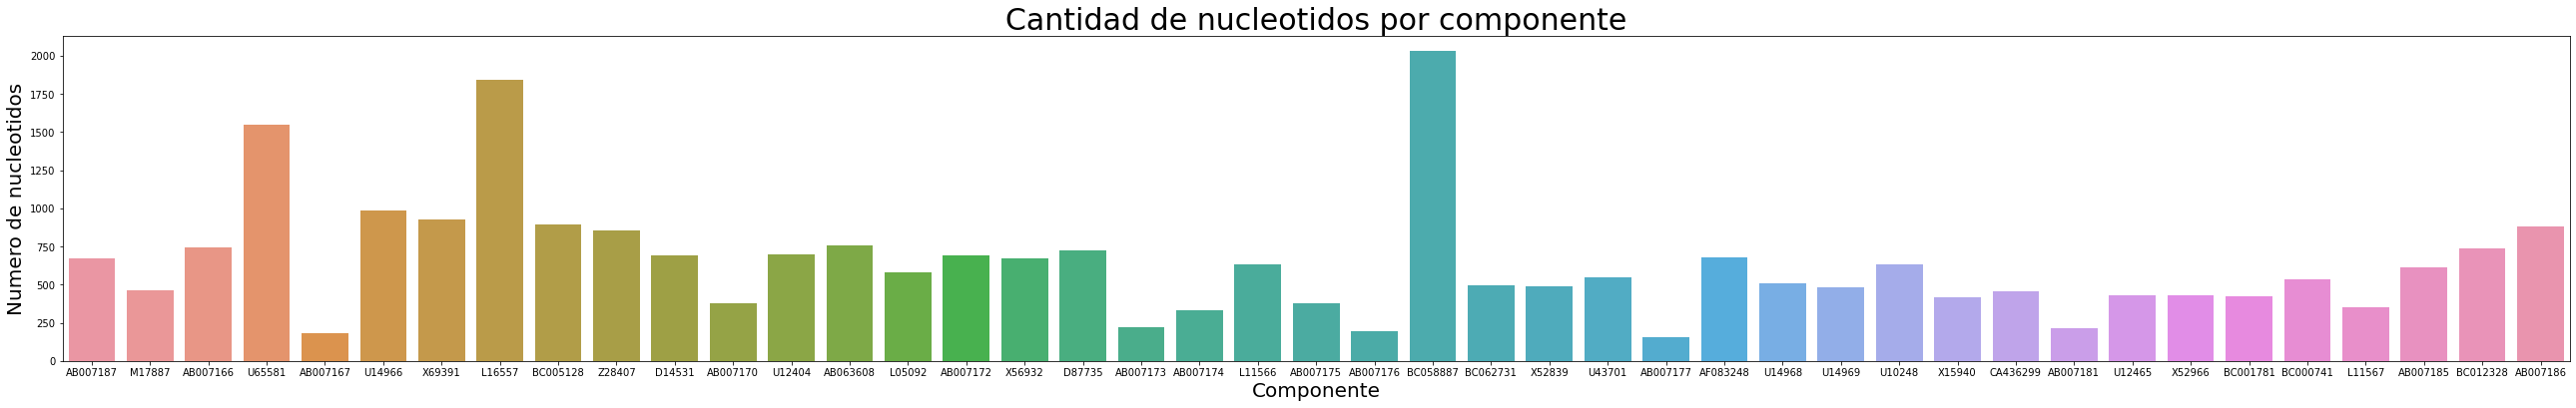

In [16]:
#Codigo para el histograma

f=IDs #Nombre de los componentes
h=h #Cantidad de nucleòtidos
fig = plt.figure(1, figsize=(45, 6))
plt.title('Cantidad de nucleotidos por componente',fontsize = 30)
plt.xlabel('Componente', fontsize = 20, rotation = 0)
plt.ylabel('Numero de nucleotidos', fontsize = 20, rotation = 90)
sns.barplot(f, h)
plt.show()

## Ejercicio 4 [2 puntos]
Realizar un árbol filogenético donde se muestre las secuencias de células normales y las células cancerosas. Explique los hallazgos.

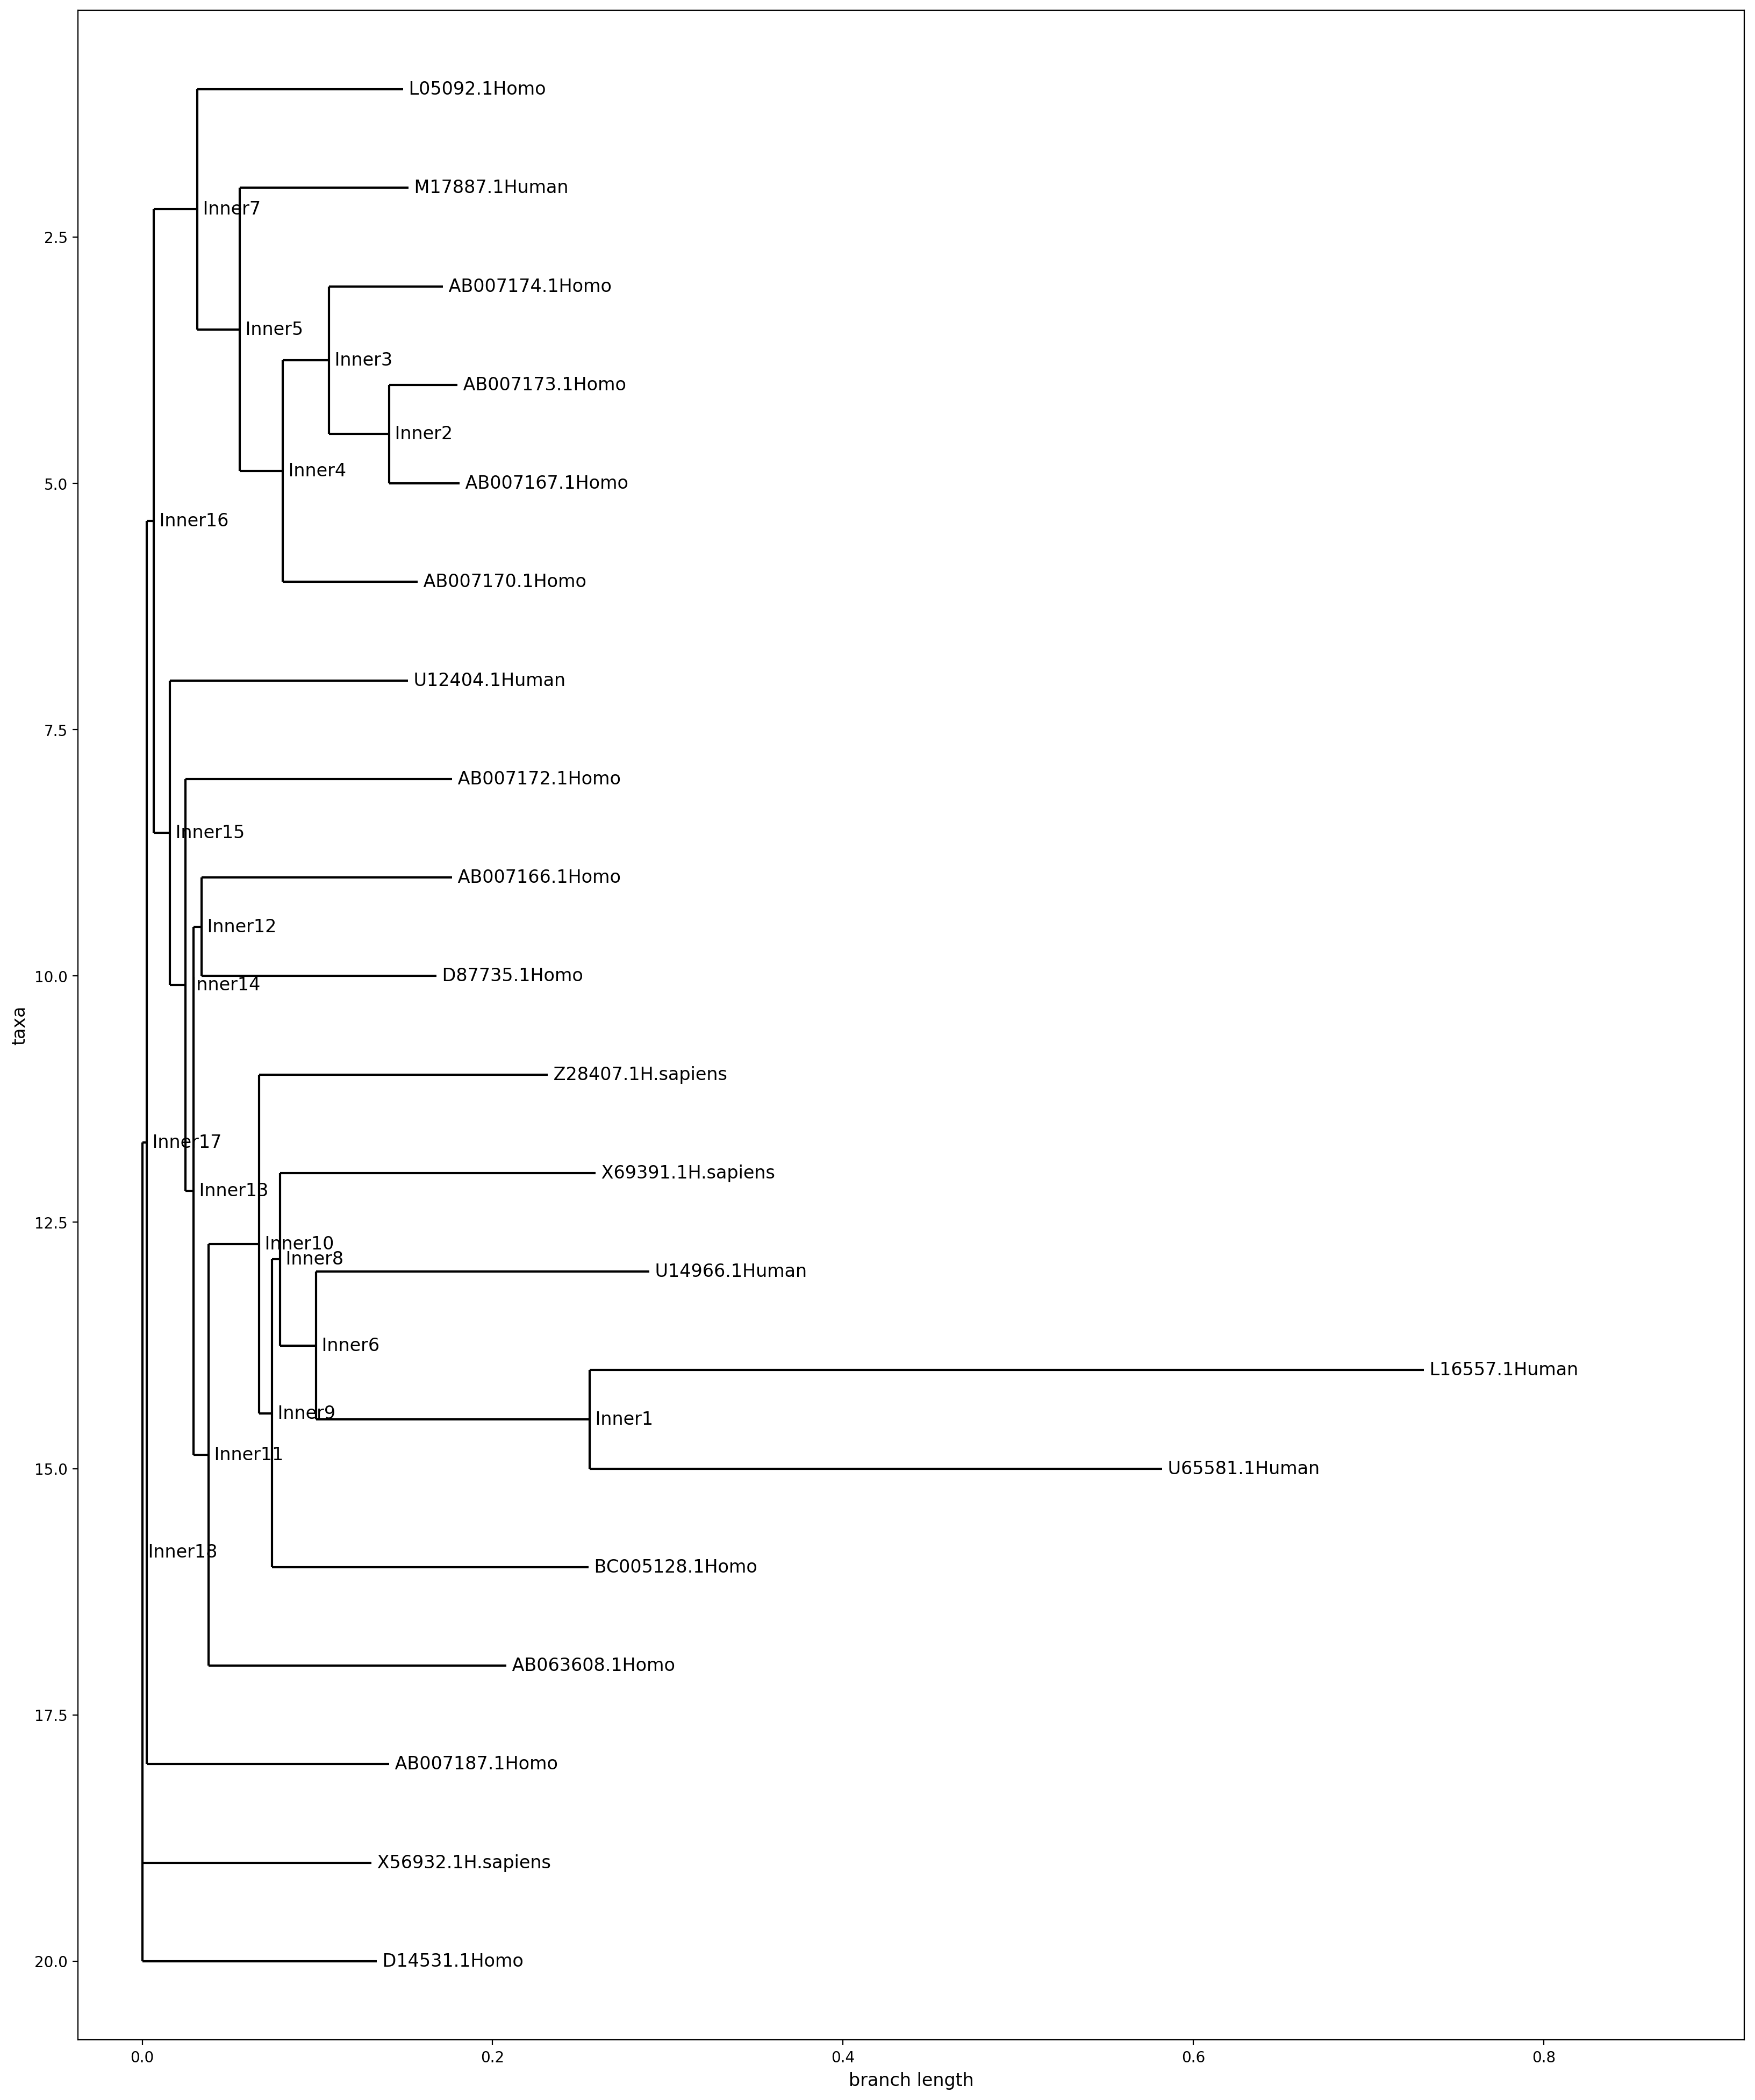

In [20]:
#Codigo para el arbol filogenetico 

ffile=open('Data/Sequence.fasta','w')
with open("Data/SequenceLRibosomal.gb",'r') as genbank:
    c=genbank.read()
    for lin in c:
        ffile.write(str(lin))

clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/Sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout,stderr = clustalw_cline()

ClustalAlign = AlignIO.read("Data/Sequence.aln", "clustal")

calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(ClustalAlign)

constructor = DistanceTreeConstructor(calculator)
Data_tree = constructor.build_tree(ClustalAlign)
Data_tree.rooted = True

Phylo.write(Data_tree, "Data/Data_tree.xml", "phyloxml")

fig = plt.figure(figsize=(20, 25), dpi=200)  
matplotlib.rc('font', size=12)               
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(Data_tree, axes=axes)


### Bibliografía

Cañedo Andalia, R., Rodríguez Labrada, R., & Vázquez Mojena, Y. (2009). Centro Nacional para la Información Biotecnológica de los Estados Unidos: un palacio de la información para la medicina molecular. Acimed, 19(4), 0-0. Obtenido de: http://scielo.sld.cu/scielo.php?pid=S1024-94352009000400003&script=sci_arttext&tlng=en 

Povey, S., Lovering, R., Bruford, E., Wright, M., Lush, M., & Wain, H. (2001). The HUGO gene nomenclature committee (HGNC). Human genetics, 109(6), 678-680. Obtenido de: https://www.genenames.org/files/PMID11810281.pdf 

Ramos, D. A. C., & Vila-Sanjurjo, A. (2009). El ribosoma y la traducción genética. Investigación y ciencia, (399), 48-57. Obtenido de: https://dialnet.unirioja.es/servlet/articulo?codigo=3087922 

Moin, M., Bakshi, A., Saha, A., Dutta, M., Madhav, S. M., & Kirti, P. B. (2016). Rice ribosomal protein large subunit genes and their spatio-temporal and stress regulation. Frontiers in plant science, 7, 1284. Obtenido de: https://www.frontiersin.org/articles/10.3389/fpls.2016.01284/full

Talevich, E., Invergo, B. M., Cock, P. J., & Chapman, B. A. (2012). Bio. Phylo: a unified toolkit for processing, analyzing and visualizing phylogenetic trees in Biopython. BMC bioinformatics, 13(1), 1-9.  Obtenido de: https://link.springer.com/article/10.1186/1471-2105-13-209 

Tzvetanka D. Dinkova, Estela Sánchez de Jiménez, El ribosoma: lo que nos ha enseñado su estructura*, Educación Química, Volume 21, Issue 1, 2010, Pages 93-95, ISSN 0187-893X, https://doi.org/10.1016/S0187-893X(18)30079-X 

Zhou, X., Liao, W. J., Liao, J. M., Liao, P., & Lu, H. (2015). Ribosomal proteins: functions beyond the ribosome. Journal of molecular cell biology, 7(2), 92-104. Obtenido de: https://www.cell.com/trends/biochemical-sciences/pdf/S0968-0004(96)20011-8.pdf 
